# INSY695 Individual Assignment 1

    Student Name: Arpit Nagpal
    Student ID: 261026425

A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable business model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion.

One of the startup's first tasks is raising a substantial amount of money to further develop the product. To do that, they have to make a strong argument, if not a prototype, that supports their claim that their idea is truly new or a great improvement to something on the market.

The aim of this project is to build a regression model for the prediction of total funding of a startup (in USD) based on predictors such as market/industry, startup founding date or seed funding amount to aid the predictions evaluation of a given startup, provided the details of the desired predictors.

# 1. Importing the dataset and required libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, Ridge, LinearRegression, Lasso
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

df=pd.read_csv(r"C:\Users\91989\OneDrive\Desktop\Startup_Investment_Data.csv")

In [2]:
desc = ['Static hyperlink for the startup on Crunchbase\'s website','name of the startup','Website address of the startup',
       'in which category the startups fall','which market the startup caters to','total funding received(in USD)',
        'current operating status','country of origin','state of origin','region','city of origin','total rounds of funding',
        'date of founding','month of founding','quarter of founding','year of founding','date of first funding','date of last funding',
        'seed funding received(in USD)','venture funding received(in USD)','funding received by diluting equity',
        'other undisclosed funding sources','funding received from convertible notes','funding received from debts',]
df_details = pd.DataFrame(list(zip(df.columns, desc)), columns =['Column', 'Description'])
df_details

,Column,Description
0,permalink,Static hyperlink for the startup on Crunchbase...
1,name,name of the startup
2,homepage_url,Website address of the startup
3,category_list,in which category the startups fall
4,market,which market the startup caters to
5,funding_total_usd,total funding received(in USD)
6,status,current operating status
7,country_code,country of origin
8,state_code,state of origin
9,region,region


# 2. Data Exploration of the imported dataset

Information about the dataframe including the data types of each column and memory usage of the entire data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   permalink            49438 non-null  object 
 1   name                 49437 non-null  object 
 2   homepage_url         45989 non-null  object 
 3   category_list        45477 non-null  object 
 4   market               45470 non-null  object 
 5   funding_total_usd    49438 non-null  object 
 6   status               48124 non-null  object 
 7   country_code         44165 non-null  object 
 8   state_code           30161 non-null  object 
 9   region               44165 non-null  object 
 10  city                 43322 non-null  object 
 11  funding_rounds       49438 non-null  int64  
 12  founded_at           38554 non-null  object 
 13  founded_month        38482 non-null  object 
 14  founded_quarter      38482 non-null  object 
 15  founded_year         38482 non-null 

Display of top 10 rows in the dataset to analyse and interpret the predictors:

In [4]:
df.head(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,2012-Q2,2012.0,30-06-2012,30-06-2012,1750000,0,0,0,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,NaN,NaN,04-06-2010,23-09-2010,0,4000000,0,0,0,0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,2012-Q4,2012.0,09-08-2012,09-08-2012,40000,0,0,0,0,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,2011-Q2,2011.0,01-04-2011,01-04-2011,1500000,0,0,0,0,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,2014-Q1,2014.0,17-08-2014,26-09-2014,0,0,60000,0,0,0
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,"70,00,000",NaN,USA,FL,Ft. Lauderdale,...,2011-Q4,2011.0,31-05-2013,31-05-2013,0,7000000,0,0,0,0
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,...,NaN,NaN,16-01-2007,16-01-2007,0,0,0,4912393,0,0
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,...,2007-Q1,2007.0,19-03-2008,19-03-2008,0,2000000,0,0,0,0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,2010-Q1,2010.0,24-07-2014,24-07-2014,0,0,0,0,0,0
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,...,NaN,NaN,01-07-2014,01-07-2014,41250,0,0,0,0,0


Interpreation of distributions and statistical estimates of the numerical predictors:

In [5]:
df.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing
count,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06
std,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08
min,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10


Checking for Null or Nan values in the dataset per column present in the dataset:

In [6]:
df.isna().sum()

permalink                  0
name                       1
homepage_url            3449
category_list           3961
market                  3968
funding_total_usd          0
status                  1314
country_code            5273
state_code             19277
region                  5273
city                    6116
funding_rounds             0
founded_at             10884
founded_month          10956
founded_quarter        10956
founded_year           10956
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
dtype: int64

In [7]:
data_na=df.isna().mean().to_frame()
data_na[data_na[0]>0].style.background_gradient(cmap='Blues')

,0
name,0.000020
homepage_url,0.069764
category_list,0.080121
market,0.080262
status,0.026579
country_code,0.106659
state_code,0.389923
region,0.106659
city,0.123711
founded_at,0.220155


Analysis of distribution of probable predictor variables present in the dataset:

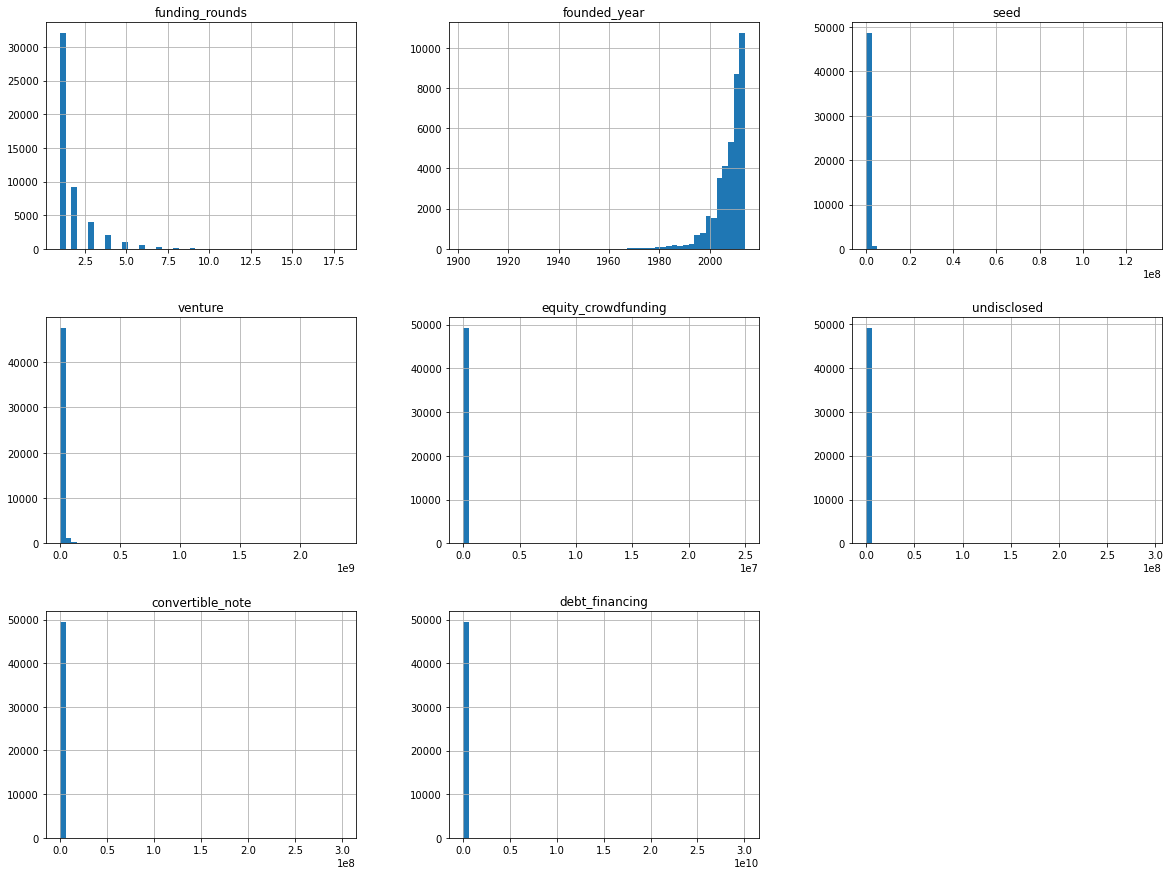

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.000000,2.013814,1.398832,1.000000,1.000000,2.000000,3.000000,15.000000
closed,2603.000000,1.434114,0.965478,1.000000,1.000000,1.000000,2.000000,11.000000
operating,41829.000000,1.689522,1.302072,1.000000,1.000000,1.000000,2.000000,18.000000


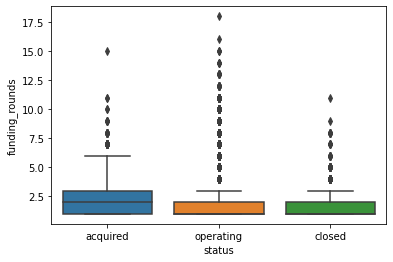

In [9]:
sns.boxplot(data=df,x='status',y='funding_rounds')
df.groupby('status')['funding_rounds'].describe().style.highlight_max(subset=['max','75%','50%','std','mean'],color='lightgreen')

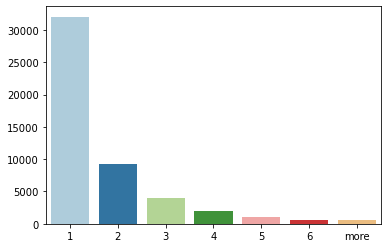

In [10]:
funding_rounds=df.funding_rounds.value_counts()
other=funding_rounds[funding_rounds.index>=7].sum()
funding_rounds=funding_rounds[funding_rounds.index<7]
funding_rounds.index=funding_rounds.index.astype('int').astype('str')
funding_rounds.loc['more']=other

sns.barplot(x=funding_rounds.index,y=funding_rounds.values,palette='Paired')
plt.show()

Checking correlation among the predictor variables to balance their contribution to prediction, and ensure sufficient data quality.

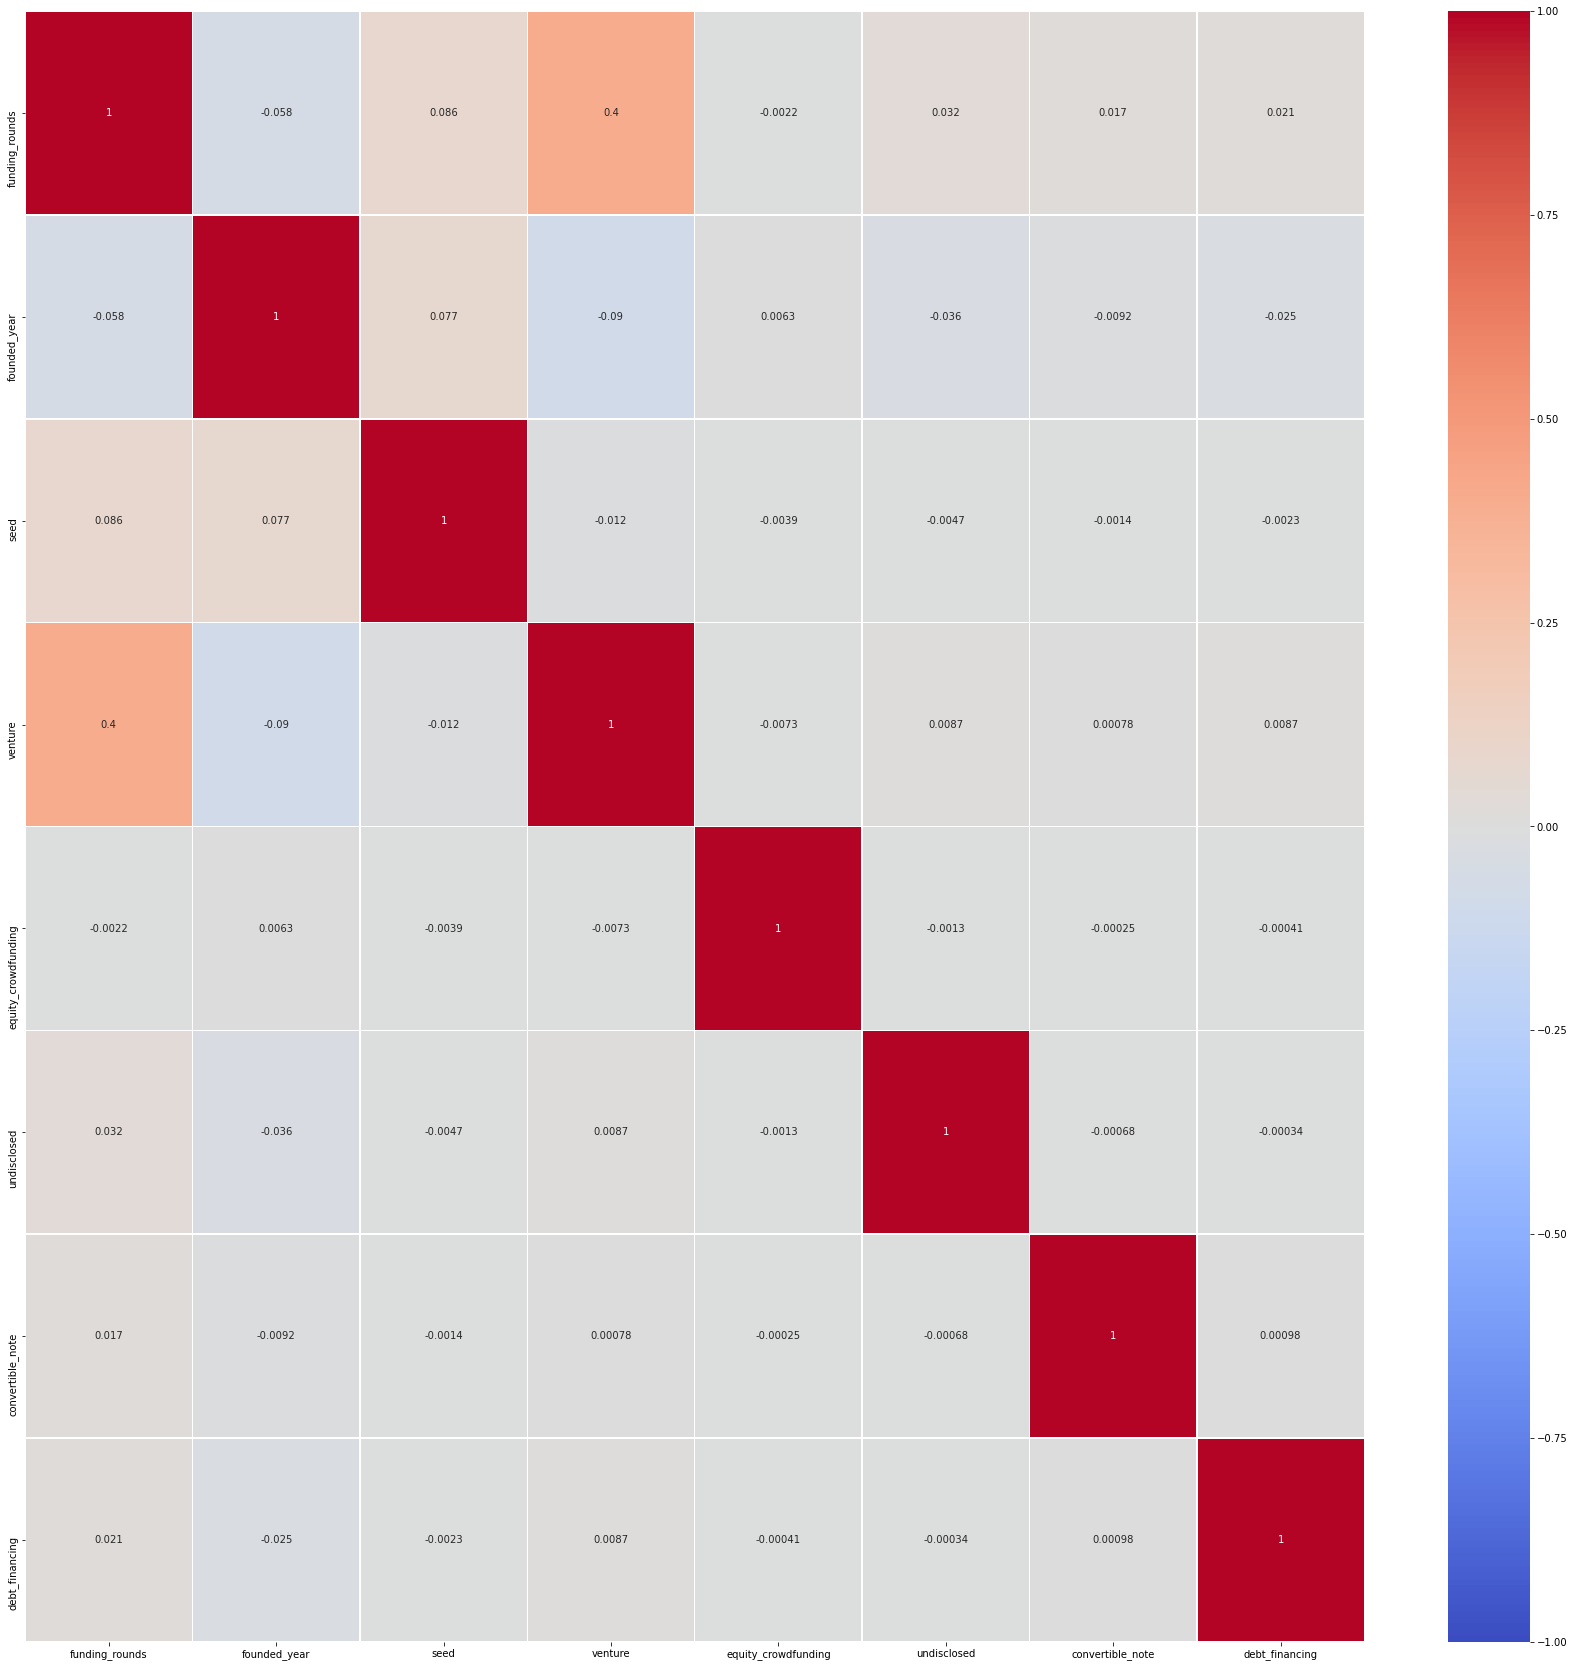

In [11]:
plt.figure(figsize=(30,30))
startup_heat = df.corr()

startup_heat= sns.heatmap(startup_heat, annot=True,linewidth = 0.5, cmap='coolwarm', vmin=-1, vmax=1)

bottom, top = startup_heat.get_ylim()
startup_heat.set_ylim(bottom, top)

plt.show()

Creation of pandas data profile of the dataset for in-depth exploratory data analysis

In [12]:
profile = ProfileReport(df)
profile.to_file(output_file='Investments_Data_Profile.html')

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Data Cleaning and Pre-processing for extracting features

We want to predict the funding of a startup, any row without that data is useless and will be removed:

In [13]:
df=df.dropna(subset=['funding_total_usd'])

Dropping duplicate values for same startup given in the dataset:

In [14]:
df=df.drop_duplicates(subset=['name'])

Dropping columns with high degree of distinct values and predictors unique to a tuple:

In [15]:
df=df.drop(['permalink','name','homepage_url'], axis=1)

funding_total_usd column is converted from string to float:

In [16]:
df['funding_total_usd'] = df['funding_total_usd'].str.strip().str.replace(",","")
df['funding_total_usd'] = df['funding_total_usd'].replace("-",0).astype("float")

df=df.reset_index(drop=True)

Dropping other Null value tuples present in the dataset with threshold of non-NULL values as 18 ( i.e., any rows with less than 18 non-NULL values out of 21 columns would be dropped from the dataset)

In [17]:
df=df.dropna(thresh=18)
df=df.reset_index(drop=True)

In [18]:
df

,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing
0,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,01-06-2012,...,2012-Q2,2012.0,30-06-2012,30-06-2012,1750000,0,0,0,0,0
1,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,26-10-2012,...,2012-Q4,2012.0,09-08-2012,09-08-2012,40000,0,0,0,0,0
2,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,01-04-2011,...,2011-Q2,2011.0,01-04-2011,01-04-2011,1500000,0,0,0,0,0
3,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,01-01-2014,...,2014-Q1,2014.0,17-08-2014,26-09-2014,0,0,60000,0,0,0
4,|Software|,Software,7000000.0,NaN,USA,FL,Ft. Lauderdale,Oakland Park,1,10-10-2011,...,2011-Q4,2011.0,31-05-2013,31-05-2013,0,7000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35321,|Biotechnology|,Biotechnology,15419877.0,closed,MYS,NaN,MYS - Other,Damansara New Village,4,01-01-1994,...,1994-Q1,1994.0,01-01-2008,15-02-2013,0,7991547,0,0,0,0
35322,|Biotechnology|,Biotechnology,2686600.0,operating,AUT,NaN,Vienna,Gerasdorf Bei Wien,1,01-01-2007,...,2007-Q1,2007.0,29-01-2013,29-01-2013,0,2686600,0,0,0,0
35323,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000.0,operating,GBR,NaN,London,London,1,28-01-2013,...,2013-Q1,2013.0,24-03-2014,24-03-2014,320000,0,0,0,0,0
35324,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398.0,operating,HRV,NaN,Split,Split,5,13-05-2012,...,2012-Q2,2012.0,01-11-2011,10-09-2014,71525,0,0,0,25873,0


We wish to pick the most common markets in this data. To select these markets, we filter the dataset based on the count of the market associated to the startup. For market counts less than 20, we drop the tuples in that market and filter higher frequency markets to enhance model performance on the selected markets:

In [19]:
df['market'].value_counts()

 Software                   3595
 Biotechnology              2410
 Mobile                     1450
 E-Commerce                 1306
 Curated Web                1178
                            ... 
 EBooks                        1
 Commercial Solar              1
 Contact Centers               1
 Cyber                         1
 Estimation and Quoting        1
Name: market, Length: 722, dtype: int64

In [20]:
values = df['market'].value_counts().keys().tolist()
counts = df['market'].value_counts().tolist()

for i in range(len(values)):
    if counts[i]<=20:
        df.drop(df.loc[df['market']==values[i]].index, inplace=True)
        
df=df.reset_index(drop=True)

Also, for certain countries with data for more than 50 startups would be considered to maintain less complexity and higher accuracy of the regression model. Similarly for other geographic datapoints, for trade-off between complexity, accuracy and applicability, we would remove records for comparative counts:

    BLOCKER: The reason to reduce counts was also computational limitation. Without these filters, there were 4774 columns present after the transformation in the dataset including the target variable. Due to local system computational limitation, these logical filters are introduced to reduce the columns to 804.

In [21]:
values = df['country_code'].value_counts().keys().tolist()
counts = df['country_code'].value_counts().tolist()

for i in range(len(values)):
    if counts[i]<=50:
        df.drop(df.loc[df['country_code']==values[i]].index, inplace=True)
        
values = df['state_code'].value_counts().keys().tolist()
counts = df['state_code'].value_counts().tolist()

for i in range(len(values)):
    if counts[i]<=25:
        df.drop(df.loc[df['state_code']==values[i]].index, inplace=True)
        
values = df['region'].value_counts().keys().tolist()
counts = df['region'].value_counts().tolist()

for i in range(len(values)):
    if counts[i]<=15:
        df.drop(df.loc[df['region']==values[i]].index, inplace=True)
        
values = df['city'].value_counts().keys().tolist()
counts = df['city'].value_counts().tolist()

for i in range(len(values)):
    if counts[i]<=10:
        df.drop(df.loc[df['city']==values[i]].index, inplace=True)
        
df=df.reset_index(drop=True)

In [22]:
df

,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing
0,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,01-06-2012,...,2012-Q2,2012.0,30-06-2012,30-06-2012,1750000,0,0,0,0,0
1,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,01-04-2011,...,2011-Q2,2011.0,01-04-2011,01-04-2011,1500000,0,0,0,0,0
2,|Software|,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,01-01-2010,...,2010-Q1,2010.0,24-07-2014,24-07-2014,0,0,0,0,0,0
3,|Health and Wellness|,Health and Wellness,0.0,operating,USA,CA,Los Angeles,Los Angeles,1,01-01-1986,...,1986-Q1,1986.0,19-08-2010,19-08-2010,0,0,0,0,0,0
4,|Real Estate|,Real Estate,0.0,operating,USA,FL,Orlando,Orlando,1,07-12-2013,...,2013-Q4,2013.0,22-01-2014,22-01-2014,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24035,|Technology|Facebook Applications|Networking|G...,Technology,866550786.0,operating,USA,CA,SF Bay Area,San Francisco,9,01-07-2007,...,2007-Q3,2007.0,01-01-2007,18-02-2011,0,866550786,0,0,0,0
24036,|Biotechnology|,Biotechnology,25000000.0,operating,USA,MD,"Washington, D.C.",Gaithersburg,1,01-01-2008,...,2008-Q1,2008.0,09-09-2010,09-09-2010,0,25000000,0,0,0,0
24037,|Biotechnology|,Biotechnology,34275015.0,operating,USA,MO,MO - Other,Fremont,4,01-01-1998,...,1998-Q1,1998.0,29-01-2010,26-03-2014,0,26775015,0,0,0,0
24038,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000.0,operating,GBR,NaN,London,London,1,28-01-2013,...,2013-Q1,2013.0,24-03-2014,24-03-2014,320000,0,0,0,0,0


Download the data as a CSV file to analyse further data cleaning scope: df.to_csv(r'C:\Users\91989\OneDrive\Desktop\McGill MMA\Investment_Data.csv',index = False, header=True)

Splitting the value of date values of first funding and last funding of startup total funding dataset:

In [23]:
#Extracting year value from "first_funding_at" and changing to int
df['first_funding_at_year'] = df.first_funding_at.str.split("-").str[2]
df['first_funding_at_year'] = df['first_funding_at_year'].astype(int)
#Extracting year value from "last_funding_at" and changing to int
df['last_funding_at_year'] = df.last_funding_at.str.split("-").str[2]
df['last_funding_at_year'] = df['last_funding_at_year'].astype(int)

#Extracting month value from "first_funding_at" and changing to str
df['first_funding_at_month'] = df.first_funding_at.str.split("-").str[1]
df['first_funding_at_month'] = df['first_funding_at_month'].astype(str)
#Extracting month value from "last_funding_at" and changing to str
df['last_funding_at_month'] = df.last_funding_at.str.split("-").str[1]
df['last_funding_at_month'] = df['last_funding_at_month'].astype(str)

Extracted founding month value and founded quarter of the year value from their respective columns:

In [24]:
df['founded_month'] = df.founded_month.str.split("-").str[1]
df['founded_month'] = df['founded_month'].astype(str)

df['founded_quarter'] = df.founded_quarter.str.split("-").str[1]
df['founded_quarter'] = df['founded_quarter'].astype(str)

Handling remaining Null values in the dataset

In [25]:
df.isna().sum()

category_list              969
market                     970
funding_total_usd            0
status                     506
country_code                 0
state_code                6113
region                       0
city                       207
funding_rounds               0
founded_at                   0
founded_month                0
founded_quarter              0
founded_year                29
first_funding_at             0
last_funding_at              0
seed                         0
venture                      0
equity_crowdfunding          0
undisclosed                  0
convertible_note             0
debt_financing               0
first_funding_at_year        0
last_funding_at_year         0
first_funding_at_month       0
last_funding_at_month        0
dtype: int64

Since the startup boom is on a rise since 1995, based on this inference we assign the mode of the founded year to the remaining 46 missing values:

In [26]:
df['founded_year'] = df['founded_year'].fillna(df['founded_year'].mode()[0])

Considering how startup boom has been on the rise and mostly countries have certain startup hubs in the form of cities or even states and since all the remaining NULL values are for categorical variables, we would replace them by mode of the column:

In [27]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [28]:
df.isna().sum()

category_list             0
market                    0
funding_total_usd         0
status                    0
country_code              0
state_code                0
region                    0
city                      0
funding_rounds            0
founded_at                0
founded_month             0
founded_quarter           0
founded_year              0
first_funding_at          0
last_funding_at           0
seed                      0
venture                   0
equity_crowdfunding       0
undisclosed               0
convertible_note          0
debt_financing            0
first_funding_at_year     0
last_funding_at_year      0
first_funding_at_month    0
last_funding_at_month     0
dtype: int64

In [29]:
df

,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,first_funding_at_year,last_funding_at_year,first_funding_at_month,last_funding_at_month
0,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,01-06-2012,...,1750000,0,0,0,0,0,2012,2012,06,06
1,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,CA,London,London,1,01-04-2011,...,1500000,0,0,0,0,0,2011,2011,04,04
2,|Software|,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,01-01-2010,...,0,0,0,0,0,0,2014,2014,07,07
3,|Health and Wellness|,Health and Wellness,0.0,operating,USA,CA,Los Angeles,Los Angeles,1,01-01-1986,...,0,0,0,0,0,0,2010,2010,08,08
4,|Real Estate|,Real Estate,0.0,operating,USA,FL,Orlando,Orlando,1,07-12-2013,...,0,0,0,0,0,0,2014,2014,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24035,|Technology|Facebook Applications|Networking|G...,Technology,866550786.0,operating,USA,CA,SF Bay Area,San Francisco,9,01-07-2007,...,0,866550786,0,0,0,0,2007,2011,01,02
24036,|Biotechnology|,Biotechnology,25000000.0,operating,USA,MD,"Washington, D.C.",Gaithersburg,1,01-01-2008,...,0,25000000,0,0,0,0,2010,2010,09,09
24037,|Biotechnology|,Biotechnology,34275015.0,operating,USA,MO,MO - Other,Fremont,4,01-01-1998,...,0,26775015,0,0,0,0,2010,2014,01,03
24038,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000.0,operating,GBR,CA,London,London,1,28-01-2013,...,320000,0,0,0,0,0,2014,2014,03,03


# 4. Feature Engineering and Selection of predictors for the regression model

To reduce the complexity, while processing the date variable fields, we convert the actual dates to 
relative dates, describing the distance from founded to first and last funding and then drop the founded date.
And also check data redundancy and drop columns accordingly

In [30]:
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format="%d-%m-%Y",errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format="%d-%m-%Y",errors='coerce')
df['founded_at'] = pd.to_datetime(df['founded_at'], format="%d-%m-%Y",errors='coerce')

In [31]:
df['age_first_funding'] = (df['first_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
df['age_last_funding'] = (df['last_funding_at']-df['founded_at'])/pd.Timedelta(days=365)
                                                                               
df=df.drop(['founded_at','first_funding_at','last_funding_at'], axis=1)

In [32]:
df.isna().sum()

category_list              0
market                     0
funding_total_usd          0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
funding_rounds             0
founded_month              0
founded_quarter            0
founded_year               0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
first_funding_at_year      0
last_funding_at_year       0
first_funding_at_month     0
last_funding_at_month      0
age_first_funding         30
age_last_funding          27
dtype: int64

In [33]:
df=df.dropna()
df=df.reset_index(drop=True)

Since there is an overlap between category_list and market, we would drop category_list and create an additional column to add number of categories or category count:

In [34]:
df['category_count'] =df['category_list'].str.split('|').str.len()-1
df['category_count']=df['category_count']-1

df=df.drop(['category_list'], axis=1)

Before feature transformation of categorical variables in the dataset, we would check the correlation matrix again to rectify any related issues:

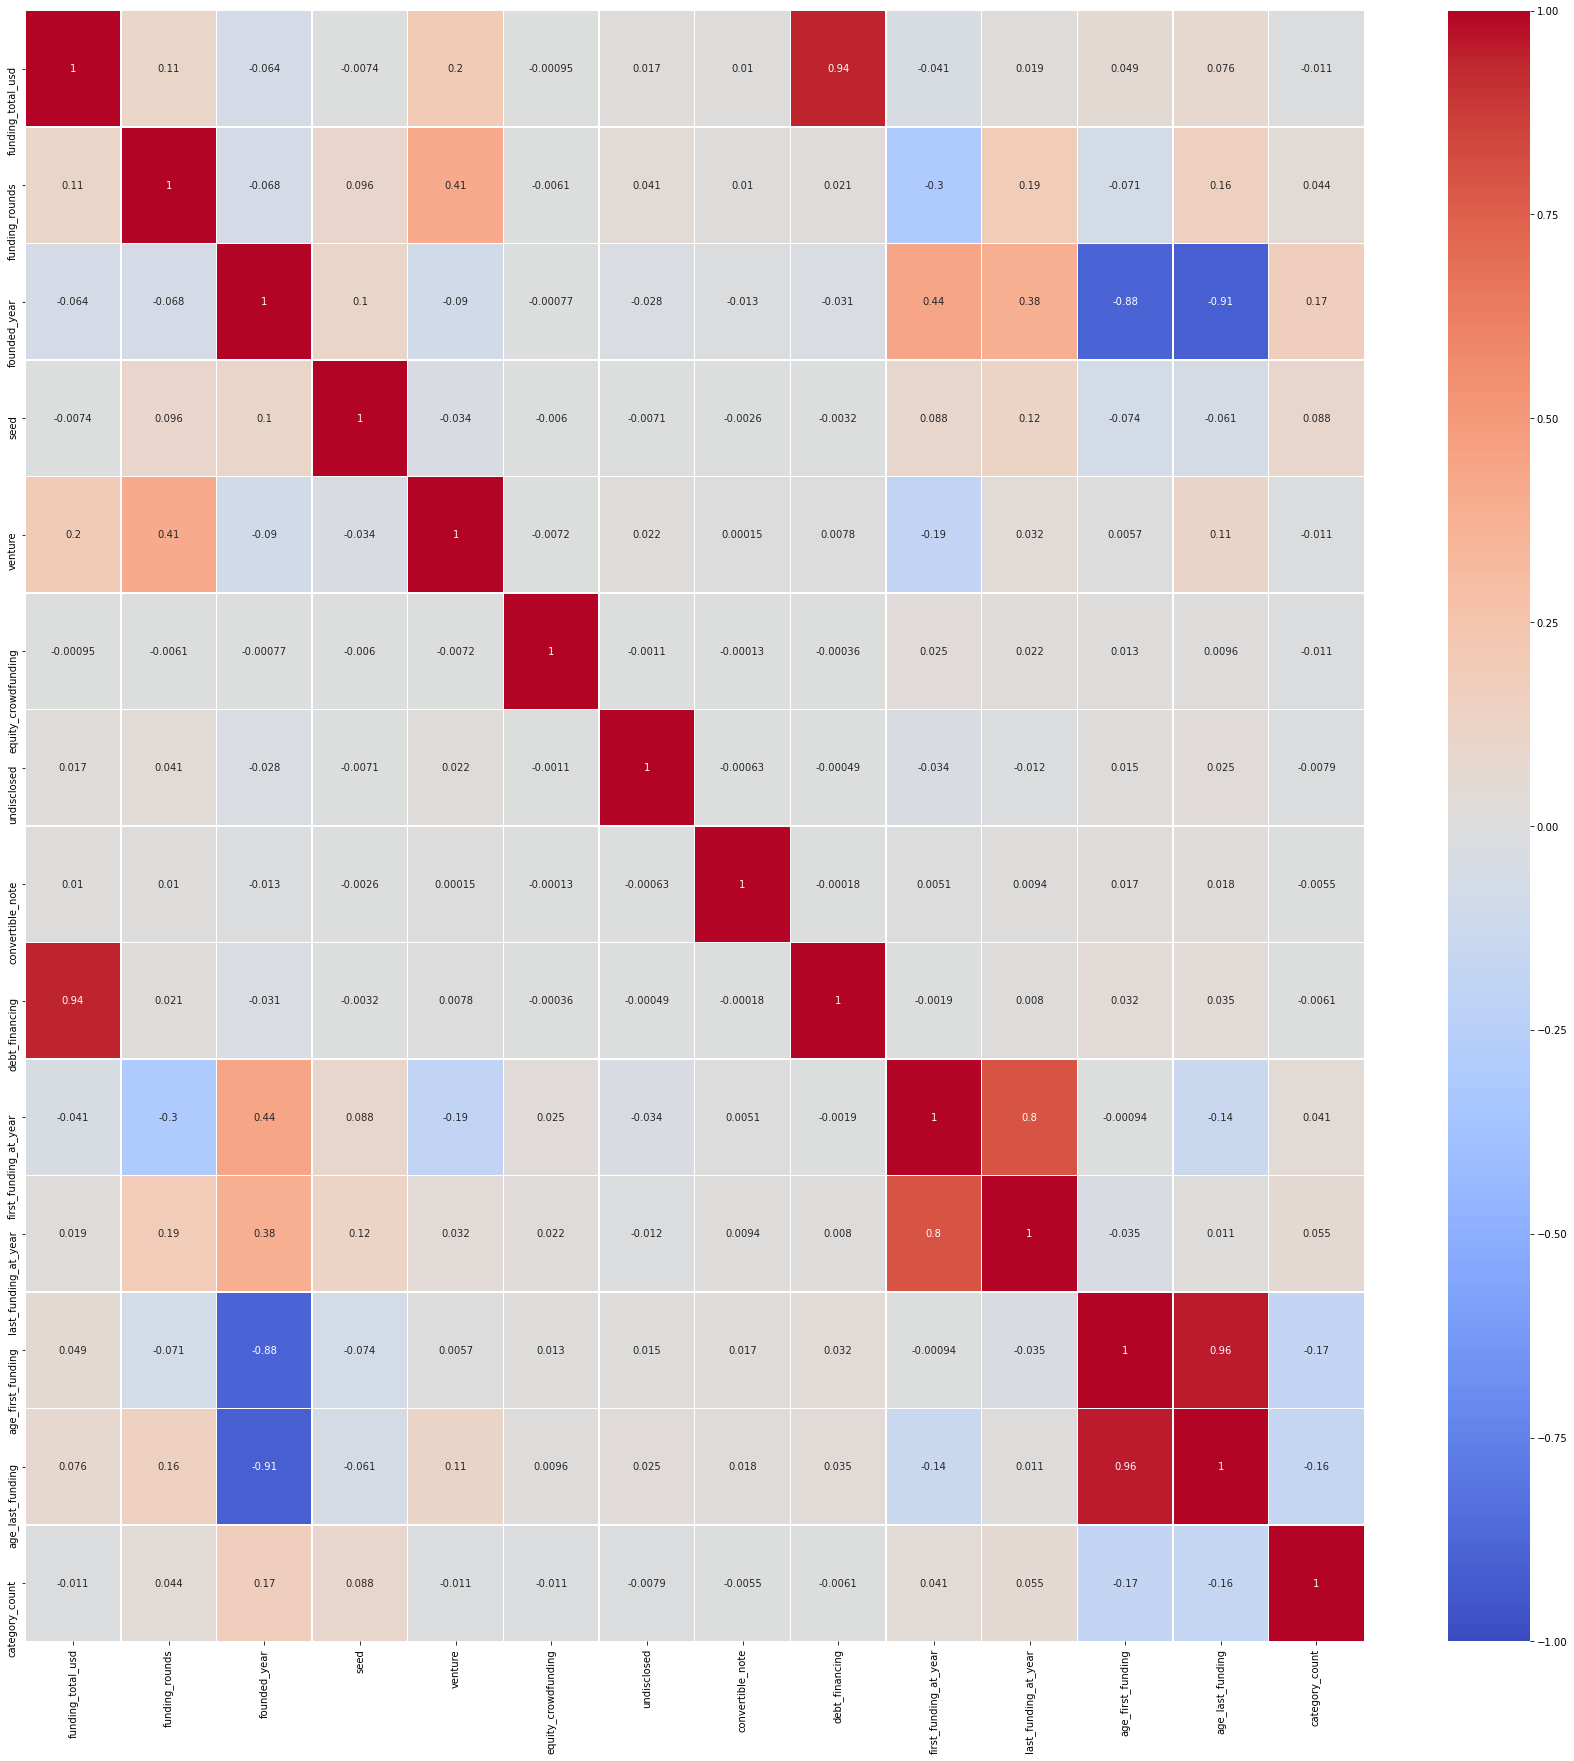

In [35]:
plt.figure(figsize=(30,30))
startup_heat = df.corr()

startup_heat= sns.heatmap(startup_heat, annot=True,linewidth = 0.5, cmap='coolwarm', vmin=-1, vmax=1)

bottom, top = startup_heat.get_ylim()
startup_heat.set_ylim(bottom, top)

plt.show()

In [36]:
# Based on the correlation data, we would drop columns age_first_funding and founded_year since both are highly correlated with age_last_funding

df=df.drop(['age_first_funding','founded_year'], axis=1)

In [37]:
df

,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_month,founded_quarter,...,equity_crowdfunding,undisclosed,convertible_note,debt_financing,first_funding_at_year,last_funding_at_year,first_funding_at_month,last_funding_at_month,age_last_funding,category_count
0,News,1750000.0,acquired,USA,NY,New York City,New York,1,06,Q2,...,0,0,0,0,2012,2012,06,06,0.079452,4
1,Electronics,1500000.0,operating,GBR,CA,London,London,1,04,Q2,...,0,0,0,0,2011,2011,04,04,0.000000,10
2,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,01,Q1,...,0,0,0,0,2014,2014,07,07,4.561644,1
3,Health and Wellness,0.0,operating,USA,CA,Los Angeles,Los Angeles,1,01,Q1,...,0,0,0,0,2010,2010,08,08,24.646575,1
4,Real Estate,0.0,operating,USA,FL,Orlando,Orlando,1,12,Q4,...,0,0,0,0,2014,2014,01,01,0.126027,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24005,Technology,866550786.0,operating,USA,CA,SF Bay Area,San Francisco,9,07,Q3,...,0,0,0,0,2007,2011,01,02,3.638356,4
24006,Biotechnology,25000000.0,operating,USA,MD,"Washington, D.C.",Gaithersburg,1,01,Q1,...,0,0,0,0,2010,2010,09,09,2.690411,1
24007,Biotechnology,34275015.0,operating,USA,MO,MO - Other,Fremont,4,01,Q1,...,0,0,0,0,2010,2014,01,03,16.241096,1
24008,Education,320000.0,operating,GBR,CA,London,London,1,01,Q1,...,0,0,0,0,2014,2014,03,03,1.150685,6


Assign labels to columns status, funding_rounds, founded_month, founded_quarter, first_funding_at_month and last_funding_at_month. The remaining categorical variables are dummified: 

In [38]:
labelencoder=LabelEncoder()
df['status']=labelencoder.fit_transform(df['status'])
df['funding_rounds']=labelencoder.fit_transform(df['funding_rounds'])
df['founded_month']=labelencoder.fit_transform(df['founded_month'])
df['founded_quarter']=labelencoder.fit_transform(df['founded_quarter'])
df['first_funding_at_month']=labelencoder.fit_transform(df['first_funding_at_month'])
df['last_funding_at_month']=labelencoder.fit_transform(df['last_funding_at_month'])

In [39]:
df_transformed=pd.get_dummies(df)

In [40]:
df_transformed

,funding_total_usd,status,funding_rounds,founded_month,founded_quarter,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,city_Westborough,city_Westlake Village,city_Westminster,city_Weston,city_Westport,city_Wilmington,city_Woburn,city_Woodland Hills,city_Z�rich,city_�an
0,1750000.0,0,0,5,1,1750000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500000.0,2,0,3,1,1500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,2,0,11,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24005,866550786.0,2,8,6,2,0,866550786,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24006,25000000.0,2,0,0,0,0,25000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24007,34275015.0,2,3,0,0,0,26775015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24008,320000.0,2,0,0,0,320000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We would remove the outliers present in the dataset points beyond 3 standard deviations for the column funding_total_usd in the dataset:

In [41]:
df_transformed[np.abs(df_transformed.funding_total_usd-df_transformed.funding_total_usd.mean()) <= (3*df_transformed.funding_total_usd.std())]

,funding_total_usd,status,funding_rounds,founded_month,founded_quarter,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,city_Westborough,city_Westlake Village,city_Westminster,city_Weston,city_Westport,city_Wilmington,city_Woburn,city_Woodland Hills,city_Z�rich,city_�an
0,1750000.0,0,0,5,1,1750000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500000.0,2,0,3,1,1500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,2,0,11,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24004,0.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24006,25000000.0,2,0,0,0,0,25000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24007,34275015.0,2,3,0,0,0,26775015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24008,320000.0,2,0,0,0,320000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will split the finalised dataset into test and train for feature selection for the final predictors present in the dataset:

In [42]:
dep_var= df_transformed['funding_total_usd']
ind_var= df_transformed[[cols for cols in df_transformed.columns if 'funding_total_usd' not in cols]]

X_train,X_test,y_train,y_test=train_test_split(ind_var,dep_var,test_size=0.3,random_state=0)

In [43]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100)).fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print("Number of selected features: "+ str(len(selected_feat)))
print(selected_feat)

X_train = X_train[[cols for cols in X_train.columns if cols in selected_feat]]
X_test = X_test[[cols for cols in X_test.columns if cols in selected_feat]]

Number of selected features: 19
Index(['funding_rounds', 'seed', 'venture', 'debt_financing',
       'first_funding_at_year', 'last_funding_at_year',
       'first_funding_at_month', 'last_funding_at_month', 'age_last_funding',
       'category_count', 'market_ Biotechnology ',
       'market_ Health and Wellness ', 'market_ Hospitality ', 'state_code_CT',
       'state_code_NY', 'region_New York City', 'city_New York',
       'city_Rochester', 'city_Stamford'],
      dtype='object')


In [44]:
model= RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
result = permutation_importance(model, X_train, y_train, n_repeats=10,random_state=0)
fimp = pd.Series(result.importances_mean,index=X_train.columns.values).sort_values(ascending=False)
fimp

debt_financing                  1.125028
venture                         0.061452
age_last_funding                0.026046
city_Stamford                   0.023826
first_funding_at_month          0.007944
funding_rounds                  0.005761
last_funding_at_month           0.003394
last_funding_at_year            0.003211
market_ Health and Wellness     0.002292
first_funding_at_year           0.001930
state_code_NY                   0.001488
city_New York                   0.001368
category_count                  0.001290
region_New York City            0.000955
market_ Hospitality             0.000737
city_Rochester                  0.000445
seed                            0.000350
market_ Biotechnology           0.000281
state_code_CT                   0.000159
dtype: float64

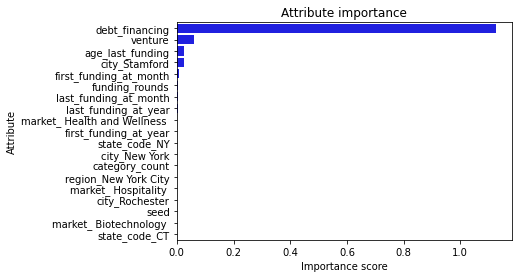

In [45]:
#Plotting feature importance
sns.barplot(x=fimp, y=fimp.index, color='b')
plt.rcParams['figure.figsize'] = 6,15
plt.xlabel('Importance score')
plt.ylabel('Attribute')
plt.title('Attribute importance')

plt.show()

Inferences regarding the feature selected from the above process:

1. Funding received from debts is the most important factor and highest contributor to the total funding of a startup. This means most fundings acquired by startups, within the scope of dataset, had debt as a major proportion.

2. Stamford and New York city seem to be the hotspot for the startup community at the moment.

3. Health and Wellness, Hospitality and Biotechnology are the major markets serving as the hotspots for startups. Such market behaviours could be demogrpahic preference shift due to the COVID19 pandemic.

4. Venture funding received, last funding received time and funding rounds are important indicators to calculate and estimate a startups total projected funding.

# 5. Regression Prediction Model Development and Selection

Linear Regression implementation on train and test to calculate the MSE and RMSE:

In [46]:
linearR=LinearRegression()
model=linearR.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for Linear regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for Linear Regression:"+str(rmse))

Test MSE net for Linear regression:5883847604029040.0
Test RMSE net for Linear Regression:76706242.27550872


LASSO regression with different alpha values (1, 10 and 100) on train and test to calculate the MSE and RMSE:

In [47]:
lassoR=Lasso(alpha=1)
model=lassoR.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for Lasso regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for Lasso Regression:"+str(rmse))

Test MSE net for Lasso regression:5883846898213750.0
Test RMSE net for Lasso Regression:76706237.67474031


C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0630320459755995e+19, tolerance: 9.98793468152435e+16
  model = cd_fast.enet_coordinate_descent(


In [48]:
lassoR=Lasso(alpha=10)
model=lassoR.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for Lasso regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for Lasso Regression:"+str(rmse))

Test MSE net for Lasso regression:5883840546383155.0
Test RMSE net for Lasso Regression:76706196.27111721


C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.108548017098719e+18, tolerance: 9.98793468152435e+16
  model = cd_fast.enet_coordinate_descent(


In [49]:
lassoR=Lasso(alpha=100)
model=lassoR.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for Lasso regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for Lasso Regression:"+str(rmse))

Test MSE net for Lasso regression:5883777078812032.0
Test RMSE net for Lasso Regression:76705782.56436755


Ridge regression with different alpha values (1, 10 and 100) on train and test to calculate the MSE and RMSE:

In [50]:
ridgeR=Ridge(alpha=1)
model=ridgeR.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for Ridge regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for Ridge Regression:"+str(rmse))

Test MSE net for Ridge regression:5877130514471330.0
Test RMSE net for Ridge Regression:76662445.26801458


C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09436e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [51]:
ridgeR=Ridge(alpha=10)
model=ridgeR.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for Ridge regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for Ridge Regression:"+str(rmse))

Test MSE net for Ridge regression:5845832508996747.0
Test RMSE net for Ridge Regression:76458044.10915013


C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93361e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [52]:
ridgeR=Ridge(alpha=100)
model=ridgeR.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for Ridge regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for Ridge Regression:"+str(rmse))

Test MSE net for Ridge regression:5804955598902537.0
Test RMSE net for Ridge Regression:76190259.21272704


C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10073e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Decision Tree regressor and Random Forest regressor model on train and test to calculate the MSE and RMSE:

In [53]:
tree_regressor=DecisionTreeRegressor(random_state=0)
model=tree_regressor.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for Tree regressor regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for Tree regressor Regression:"+str(rmse))

Test MSE net for Tree regressor regression:6111755307821064.0
Test RMSE net for Tree regressor Regression:78177716.18447973


In [54]:
model= RandomForestRegressor(n_estimators = 100).fit(X_train, y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for RF regressor regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for RF regressor Regression:"+str(rmse))

Test MSE net for RF regressor regression:6041124124265325.0
Test RMSE net for RF regressor Regression:77724668.69833107


Based on the obtained values of RMSEs of the implementation of the five selection regression models, following are the outputs of suggested evaluation metrics:


| Regression | Parameters | RMSE |
| --- | --- | --- |
| Linear | NA | 76706242.2 |
| LASSO | alpha=1 | 76706237.6 |
| LASSO | alpha=10 | 76706196.2 |
| LASSO | alpha=100 | 76705782.5 |
| Ridge | alpha=1 | 76662445.2 |
| Ridge | alpha=10 | 76458044.1 |
| Ridge | alpha=100 | 76190259.2 |
| Tree Regressor | random_state=0 | 78177716.1 |
| Random Forest Regressor | n_estimators=100 | 77724668.6 |

Based on the above results, Ridge regression with alpha=100 is the best fit for the given dataset prediction model.

NOTE: MSE and RMSE values might seem as very large but since the values of the target variable are large integer values and the range of the variable is quite high.

# 6. Fine-tuning the final regression model

Grid search implementation for best parameters of the final regression model (Ridge):

For evaluation in hyperparameter tuning, for regression prediction model we choose r2 score or R-square score to account of decent variability in the prediction

In [63]:
X_train

,funding_rounds,seed,venture,debt_financing,first_funding_at_year,last_funding_at_year,first_funding_at_month,last_funding_at_month,age_last_funding,category_count,market_ Biotechnology,market_ Health and Wellness,market_ Hospitality,state_code_CT,state_code_NY,region_New York City,city_New York,city_Rochester,city_Stamford
8003,2,0,6000000,0,2010,2012,9,8,8.687671,1,1,0,0,0,0,0,0,0,0
19748,0,663800,0,0,2013,2013,5,5,1.835616,1,0,0,0,0,0,0,0,0,0
14341,0,0,0,0,2012,2012,5,5,0.416438,1,0,0,0,0,1,1,1,0,0
3213,3,0,6600000,640000,2010,2011,10,5,4.471233,1,0,0,0,0,0,0,0,0,0
22105,0,1500000,0,0,2014,2014,9,9,1.076712,5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0,100000,0,0,2013,2013,3,3,-0.082192,1,0,0,0,0,0,0,0,0,0
19648,0,0,0,0,2013,2013,7,7,3.597260,1,0,0,0,0,0,0,0,0,0
9845,0,0,0,400,2014,2014,5,5,6.769863,1,0,0,0,0,0,0,0,0,0
10799,3,0,37015021,0,2008,2013,3,3,5.967123,6,0,0,0,0,0,0,0,0,0


In [64]:
parameters = {'alpha':[75, 125]}

model = Ridge()

Ridge_reg= GridSearchCV(model, parameters, scoring='r2',cv=3)

Ridge_reg.fit(X_train,y_train)

print(Ridge_reg.best_estimator_)

Ridge(alpha=125)


C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.30047e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.98044e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.28155e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27034e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.13136e-18): result may not be accurate

Final model implementation with optimized alpha value for Ridge Prediction Regression model:

In [67]:
ridgeR=Ridge(alpha=125)
model=ridgeR.fit(X_train,y_train)
y_test_pred=model.predict(X_test)
mse= mean_squared_error(y_test,y_test_pred)
print("Test MSE net for Ridge regression:"+str(mse))
rmse = math.sqrt(mse)
print("Test RMSE net for Ridge Regression:"+str(rmse))

Test MSE net for Ridge regression:5802710289582773.0
Test RMSE net for Ridge Regression:76175522.9032448


C:\Users\91989\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34853e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [68]:
for i in range(len(model.coef_)):
    print(str(X_train.columns.values[i]) +":"+ str(model.coef_[i]))

funding_rounds:917549.5274961635
seed:0.8174851049001896
venture:1.0785334716992518
debt_financing:1.0000856682350072
first_funding_at_year:-55759.8951755089
last_funding_at_year:357988.6347879754
first_funding_at_month:183417.11260798646
last_funding_at_month:-170120.2822974243
age_last_funding:669195.6621587848
category_count:-54944.31080980916
market_ Biotechnology :-1615890.9061428495
market_ Health and Wellness :5409416.6533797905
market_ Hospitality :3664850.0313419057
state_code_CT:24167951.40195145
state_code_NY:38682.32593864955
region_New York City:87684.21430049751
city_New York:940284.8806875367
city_Rochester:-838430.3305078556
city_Stamford:32078402.970559213


In [59]:
print("Regression Intercept: "+ str(model.intercept_))

Regression Intercept: -609517978.7004222


Inferences from the final model coefficients:

1. In this use case, intercept is not logical, hence it is only of mathematical importance to the model.
2. In terms of total funding, startups in the Health and Fitness market seem to have the highest total funding while Biotechnology startups are the worst performing startups in terms of total funding.
3. Stamford city seems to perform the best out of all the cities in the dataset in terms of total funding of startup, followed by New York. The worst performing city, impacting the total funding, is Rochester.
4. Category count has a negative impact on total funding, with increase in category in market of the startup, the total funding is expected to decrease by 54,944 USD, keeping all other variables the same. Thus, startups focused more on limited markets tend to perform better in terms of total funding.
5. With subsequent funding rounds, the average startup is exoected to increase its total funding by 917,550 USD.